In [1]:
# Ensure you have GPU resource
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

pd.options.mode.chained_assignment = None  # default='warn'
pd.set_option('display.max_columns', 500)

In [25]:
# Clone github repo from user 'chinyan'
!git clone https://github.com/chinyan/Sberbank-Russian-Housing-Market

Cloning into 'Sberbank-Russian-Housing-Market'...
remote: Counting objects: 9, done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 9 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (9/9), done.


In [0]:
# Training set
df_train = pd.read_csv('Sberbank-Russian-Housing-Market/train.csv')

In [28]:
from IPython.display import HTML

print(df_train.shape)
df_train.head()

(30471, 86)


,full_sq,floor,green_zone_part,indust_part,preschool_quota,school_quota,school_education_centers_raion,healthcare_centers_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25_raion,shopping_centers_raion,office_raion,young_male,young_female,work_male,work_female,ekder_male,ekder_female,metro_km_avto,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,water_treatment_km,cemetery_km,incineration_km,railroad_station_walk_km,railroad_station_avto_km,public_transport_station_km,water_km,mkad_km,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,big_road1_km,big_road2_km,railroad_km,zd_vokzaly_avto_km,bus_terminal_avto_km,oil_chemistry_km,nuclear_reactor_km,radiation_km,power_transmission_line_km,thermal_power_plant_km,ts_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,stadium_km,basketball_km,hospice_morgue_km,detention_facility_km,public_healthcare_km,university_km,workplaces_km,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,mosque_km,theater_km,museum_km,exhibition_km,catering_km,ecology,green_part_500,prom_part_500,office_count_500,trc_count_500,cafe_count_500,cafe_avg_price_500,big_church_count_500,church_count_500,mosque_count_500,leisure_count_500,sport_count_500,market_count_500,price_doc
0,43,4.0,0.189727,0.000070,5001.0,11065.0,5,1,7,3,0,16,1,11007,10147,52277,45930,10580,25631,1.131260,1.131260,0.145700,0.177975,2.158587,0.600973,1.080934,23.683460,1.804127,3.633334,5.419893,5.419893,0.274985,0.992631,1.422391,10.918587,13.100618,13.675657,15.156211,1.422391,3.830951,1.305159,14.231961,24.292406,18.152338,5.718519,1.210027,1.062513,5.814135,4.308127,10.814172,1.676258,0.485841,3.065047,1.107594,8.148591,3.516513,2.392353,4.248036,0.974743,6.715026,0.884350,0.648488,0.637189,0.947962,0.177975,0.625783,0.628187,3.932040,14.053047,7.389498,7.023705,0.516838,good,0.00,0.00,0,0,0,NaN,0,0,0,0,1,0,5850000
1,34,3.0,0.372602,0.049637,3119.0,6237.0,8,1,6,1,1,3,0,7925,7802,35622,34572,9266,20165,0.647337,0.635053,0.147754,0.273345,0.550690,0.065321,0.966479,1.317476,4.655004,8.648587,3.411993,3.641773,0.065263,0.698081,9.503405,3.103996,6.444333,8.132640,8.698054,2.887377,3.103996,0.694536,9.242586,5.706113,9.034642,3.489954,2.724295,1.246149,3.419574,0.725560,6.910568,3.424716,0.668364,2.000154,8.972823,6.127073,1.161579,2.543747,12.649879,1.477723,1.852560,0.686252,0.519311,0.688796,1.072315,0.273345,0.967821,0.471447,4.841544,6.829889,0.709260,2.358840,0.230287,excellent,25.14,0.00,0,0,5,1180.00,0,1,0,0,0,0,6000000
2,43,2.0,0.112560,0.118537,1463.0,5580.0,7,1,5,1,0,0,1,6835,6193,31813,31575,7609,17683,1.637996,1.445960,0.049102,0.158072,0.374848,0.453172,0.939275,4.912660,3.381083,11.996480,1.277658,1.277658,0.328756,0.468265,5.604800,2.927487,6.963403,8.054252,9.067885,0.647250,2.927487,0.700691,9.540544,6.710302,5.777394,7.506612,0.772216,1.602183,3.682455,3.562188,5.752368,1.375443,0.733101,1.239304,1.978517,0.767569,1.952771,0.621357,7.682303,0.097144,0.841254,1.510089,1.486533,1.543049,0.391957,0.158072,3.178751,0.755946,7.922152,4.273200,3.156423,4.958214,0.190462,poor,1.67,0.00,0,0,3,916.67,0,0,0,0,0,0,5700000
3,89,9.0,0.194703,0.069753,6839.0,17063.0,10,1,17,6,0,11,4,14680,13883,60040,60341,9083,20446,0.984537,0.963802,0.179441,0.236455,0.078090,0.106125,0.451173,15.623710,2.017080,14.317640,4.291432,3.816045,0.131597,1.200336,2.677824,14.606501,17.457198,18.309433,19.487005,2.677824,2.780449,1.999265,17.478380,6.734618,27.667863,9.522538,6.348716,1.767612,11.178333,0.583025,27.892717,0.811275,0.623484,1.950317,6.483172,7.385521,4.923843,3.549558,8.789894,2.163735,10.903161,0.622272,0.599914,0.934273,0.892674,0.236455,1.031777,1.561505,15.300449,16.990677,16.041521,5.029696,0.465820,good,17.36,0.57,0,0,2,1250.00,0,0,0,0,0,0,13100000
4,77,4.0,0.015234,0.037316,3240.0,7770.0,9,4,25,2,0,10,93,7159,6209,34236,33807,8563,18197,0.876620,0.688859,0.247901,0.376838,0.258289,0.236214,0.392871,10.683540,2.936581,11.9039

In [29]:
df_train.describe()

,full_sq,floor,green_zone_part,indust_part,preschool_quota,school_quota,school_education_centers_raion,healthcare_centers_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25_raion,shopping_centers_raion,office_raion,young_male,young_female,work_male,work_female,ekder_male,ekder_female,metro_km_avto,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,water_treatment_km,cemetery_km,incineration_km,railroad_station_walk_km,railroad_station_avto_km,public_transport_station_km,water_km,mkad_km,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,big_road1_km,big_road2_km,railroad_km,zd_vokzaly_avto_km,bus_terminal_avto_km,oil_chemistry_km,nuclear_reactor_km,radiation_km,power_transmission_line_km,thermal_power_plant_km,ts_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,stadium_km,basketball_km,hospice_morgue_km,detention_facility_km,public_healthcare_km,university_km,workplaces_km,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,mosque_km,theater_km,museum_km,exhibition_km,catering_km,green_part_500,prom_part_500,office_count_500,trc_count_500,cafe_count_500,cafe_avg_price_500,big_church_count_500,church_count_500,mosque_count_500,leisure_count_500,sport_count_500,market_count_500,price_doc
count,30471.000000,30304.000000,30471.000000,30471.000000,23783.000000,23786.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30446.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30446.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,17190.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,3.047100e+04
mean,54.214269,7.670803,0.218922,0.118871,3271.272464,8324.970739,4.705031,1.320895,6.635030,2.896393,0.286732,4.200978,8.253454,5723.853106,5455.013948,27253.585803,26414.414821,5811.618162,13398.167438,3.701464,3.561467,0.981684,1.323956,3.099942,0.300511,0.768831,11.167613,2.314765,10.884613,4.386945,4.587283,0.414136,0.690947,6.274764,11.318152,14.056721,15.023338,16.044808,1.881276,3.396649,1.889380,17.214848,9.992447,17.401611,10.945350,4.410781,3.492231,7.340116,4.931418,13.283916,3.958882,1.154586,4.232376,6.123672,9.436658,4.787636,2.646493,14.551103,3.356771,6.855891,3.926702,1.505808,2.010973,1.328488,1.345235,2.330047,0.972014,7.739237,9.638074,7.063236,5.552256,0.687988,13.376270,5.718070,0.740868,0.558367,3.871845,994.171628,0.286403,0.582816,0.004890,0.070592,0.914476,0.123855,7.123035e+06
std,38.031487,5.319989,0.175090,0.118688,2169.759592,4289.734174,3.445105,1.492903,6.571982,3.290058,1.510491,4.741812,23.536953,4275.438364,4020.546283,18939.154637,18643.132758,4073.828409,9144.326481,5.808432,5.775261,2.121956,3.058145,3.965363,0.298402,0.717953,7.036351,1.451071,6.789709,3.836359,3.913735,1.272488,0.434919,5.142492,8.066780,8.343162,8.475342,8.441964,1.297188,1.871334,1.972818,10.300605,7.332000,10.399510,7.249756,5.595367,4.552470,5.619330,4.804238,8.497170,3.447536,1.541425,4.626039,4.667856,7.642037,5.395468,2.952410,11.079856,4.341804,6.731484,4.907562,2.253759,2.306446,1.526219,3.053600,2.986937,0.748876,5.780424,7.112284,5.702807,5.304206,0.832922,16.051119,11.543731,2.283370,1.246089,11.283919,432.515382,1.185288,2.1638

## Data Cleaning / Feature Engineering

In [0]:
# remove rows where full_sq = 0, since full_sq is highly correlated to price_doc
df_train = df_train[df_train.full_sq != 0]

In [0]:
#impute missing values with mean
df_train = df_train.fillna(df_train.mean())

In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# split data table into data X and target variable y
X = df_train.drop(columns = ['price_doc'])
y = np.log(df_train.iloc[:, -1])

In [0]:
# transformation of the data onto unit scale; mean=0 and variance=1
X[X.select_dtypes(include=['int64', 'float64']).columns] = StandardScaler().fit_transform(X[X.select_dtypes(include=['int64', 'float64']).columns])

In [34]:
pca = PCA(n_components = 28) # total variance ~ 90%
pca.fit(X[X.select_dtypes(include=['int64', 'float64']).columns])

print(pca.explained_variance_ratio_)
print(pca.explained_variance_)

X_pca = pca.transform(X[X.select_dtypes(include=['int64', 'float64']).columns])

[0.39713959 0.09712205 0.08018431 0.0495784  0.04070413 0.02802947
 0.02523471 0.02020068 0.01675927 0.01493782 0.01374975 0.01324428
 0.01291124 0.01189538 0.01116298 0.0108653  0.01063724 0.0099954
 0.00959546 0.0086743  0.00791518 0.00716969 0.00713116 0.00645088
 0.00639839 0.00564204 0.00541467 0.00527982]
[33.36082043  8.15851972  6.7357032   4.16472239  3.41925923  2.35455271
  2.11978548  1.69691322  1.40782516  1.25481835  1.15501676  1.11255635
  1.08457956  0.99924437  0.93772077  0.91271501  0.89355721  0.83964085
  0.80604519  0.72866528  0.66489675  0.60227393  0.59903707  0.54189136
  0.53748246  0.47394675  0.4548469   0.44351966]


In [0]:
X = pd.DataFrame(X_pca)

In [36]:
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,-2.511887,0.017658,2.845470,-0.901879,0.161415,-1.133234,-0.623562,-1.544645,0.159584,-1.173118,-0.131498,0.369095,-0.724383,-0.808201,0.502926,0.827641,0.360328,0.103063,1.234872,0.799736,-0.993908,-0.331330,0.763120,-0.178204,-0.481885,0.619028,0.652255,0.485568
1,-3.275402,-0.399564,0.124796,-0.552774,0.270416,0.295059,0.382768,2.661161,0.562049,0.247595,0.074819,-0.996608,-0.156467,-0.498285,-0.394274,0.586470,-0.500844,0.812880,-0.656073,-0.129193,-0.442985,0.245836,1.648143,-0.303835,0.557969,0.637241,0.369590,0.092273
2,-3.433101,-1.348221,-0.431209,0.372600,1.475101,0.567821,1.261809,1.115173,1.146508,-0.710695,-0.333108,0.109550,-0.101425,-0.486264,-0.094522,0.727357,0.169594,0.222436,-0.634780,-0.286348,-0.107966,0.483874,0.692184,0.100740,-0.847551,0.094083,-0.077766,-0.242102
3,-1.342911,0.703460,5.552155,-0.209568,-1.017496,-0.555337,-2.027880,-1.045878,-1.224095,1.044075,0.967585,0.891199,0.151482,-0.371731,1.323126,0.168532,-0.121121,0.583502,0.615541,-1.092638,-0.030483,-0.602514,-0.168593,-0.952482,0.278568,-0.007952,-0.034327,0.559880
4,-6.230011,6.037577,-2.252439,0.722958,1.466601,-0.542875,1.398279,0.095291,1.810672,4.713064,-1.316579,3.728212,-0.568879,0.924583,-0.678620,-1.420143,-0.729867,0.763280,0.338008,-0.651752,-0.552028,-1.079619,0.624000,-0.286059,0.123770,-0.109802,0.026358,0.021754


## MLP

In [37]:
# Keras is a deep learning library that wraps the efficient numerical libraries Theano and TensorFlow.
# It provides a clean and simple API that allows you to define and evaluate deep learning models in just a few lines of code.
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, BatchNormalization, Activation
from keras.wrappers.scikit_learn import KerasRegressor
from keras.callbacks import EarlyStopping, ModelCheckpoint

# define custom R2 metrics for Keras backend
from keras import backend as K

# model evaluation
from sklearn.model_selection import KFold, train_test_split 
from sklearn.metrics import r2_score, mean_squared_error

Using TensorFlow backend.


In [38]:
# model evaluation
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, 
                                                    test_size = 0.3, 
                                                    random_state = 42)
X_train.shape, X_test.shape

((21328, 28), (9141, 28))

In [0]:
shape_ord = X_train.shape[1]

In [51]:
# NN architecture for MLP
model = Sequential()
model.add(Dense(shape_ord, input_dim=shape_ord, kernel_initializer='normal', activation='relu'))
model.add(Dense(shape_ord, input_dim=shape_ord, kernel_initializer='normal', activation='relu'))
model.add(Dense(shape_ord, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
  
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 28)                812       
_________________________________________________________________
dense_11 (Dense)             (None, 28)                812       
_________________________________________________________________
dense_12 (Dense)             (None, 28)                812       
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 29        
Total params: 2,465
Trainable params: 2,465
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Using stochastic gradient descent optimizer
from keras.utils import np_utils
from keras.optimizers import SGD

model.compile(loss='mse', 
              optimizer='sgd', 
              metrics=['mae'])

In [53]:
nb_epoch = 50  # ANN
batch_size = 80
sgd = SGD(lr=0.003, decay=1e-6, momentum=0.9, nesterov=True)

hist = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                            nb_epoch=nb_epoch, batch_size=batch_size, verbose=1)

Train on 21328 samples, validate on 9141 samples
Epoch 1/50
21328/21328 [==============================] - 1s 70us/step - loss: 9.8460 - mean_absolute_error: 1.1749 - val_loss: 0.2398 - val_mean_absolute_error: 0.3065
Epoch 2/50
21328/21328 [==============================] - 1s 68us/step - loss: 0.2734 - mean_absolute_error: 0.3321 - val_loss: 0.2695 - val_mean_absolute_error: 0.3974
Epoch 3/50
21328/21328 [==============================] - 2s 72us/step - loss: 0.2543 - mean_absolute_error: 0.3186 - val_loss: 0.2400 - val_mean_absolute_error: 0.2734
Epoch 4/50
21328/21328 [==============================] - 2s 73us/step - loss: 0.2526 - mean_absolute_error: 0.3171 - val_loss: 0.2386 - val_mean_absolute_error: 0.2665
Epoch 5/50
21328/21328 [==============================] - 2s 72us/step - loss: 0.2461 - mean_absolute_error: 0.3123 - val_loss: 0.2295 - val_mean_absolute_error: 0.2999
Epoch 6/50
21328/21328 [==============================] - 2s 75us/step - loss: 0.2449 - mean_absolute_erro

21328/21328 [==============================] - 2s 74us/step - loss: 0.2432 - mean_absolute_error: 0.3081 - val_loss: 0.2311 - val_mean_absolute_error: 0.3093
Epoch 8/50
21328/21328 [==============================] - 2s 72us/step - loss: 0.2411 - mean_absolute_error: 0.3062 - val_loss: 0.2347 - val_mean_absolute_error: 0.2671
Epoch 9/50
21328/21328 [==============================] - 2s 74us/step - loss: 0.2405 - mean_absolute_error: 0.3052 - val_loss: 0.2244 - val_mean_absolute_error: 0.3018
Epoch 10/50
21328/21328 [==============================] - 2s 73us/step - loss: 0.2395 - mean_absolute_error: 0.3040 - val_loss: 0.2346 - val_mean_absolute_error: 0.3387
Epoch 11/50
21328/21328 [==============================] - 2s 72us/step - loss: 0.2400 - mean_absolute_error: 0.3054 - val_loss: 0.2360 - val_mean_absolute_error: 0.3479
Epoch 12/50
21328/21328 [==============================] - 2s 73us/step - loss: 0.2382 - mean_absolute_error: 0.3033 - val_loss: 0.2222 - val_mean_absolute_error: 0

21328/21328 [==============================] - 2s 71us/step - loss: 0.2379 - mean_absolute_error: 0.3023 - val_loss: 0.2260 - val_mean_absolute_error: 0.2669
Epoch 14/50
21328/21328 [==============================] - 2s 73us/step - loss: 0.2379 - mean_absolute_error: 0.3024 - val_loss: 0.2266 - val_mean_absolute_error: 0.3150
Epoch 15/50
21328/21328 [==============================] - 2s 73us/step - loss: 0.2386 - mean_absolute_error: 0.3032 - val_loss: 0.2484 - val_mean_absolute_error: 0.3709
Epoch 16/50
21328/21328 [==============================] - 2s 74us/step - loss: 0.2350 - mean_absolute_error: 0.3006 - val_loss: 0.2259 - val_mean_absolute_error: 0.2709
Epoch 17/50
21328/21328 [==============================] - 2s 72us/step - loss: 0.2360 - mean_absolute_error: 0.3002 - val_loss: 0.2247 - val_mean_absolute_error: 0.2774
Epoch 18/50
21328/21328 [==============================] - 2s 73us/step - loss: 0.2365 - mean_absolute_error: 0.3015 - val_loss: 0.2258 - val_mean_absolute_error:

21328/21328 [==============================] - 2s 73us/step - loss: 0.2351 - mean_absolute_error: 0.3004 - val_loss: 0.2291 - val_mean_absolute_error: 0.3253
Epoch 20/50
21328/21328 [==============================] - 2s 72us/step - loss: 0.2346 - mean_absolute_error: 0.2992 - val_loss: 0.2284 - val_mean_absolute_error: 0.3265
Epoch 21/50
21328/21328 [==============================] - 2s 73us/step - loss: 0.2346 - mean_absolute_error: 0.2998 - val_loss: 0.2236 - val_mean_absolute_error: 0.2737
Epoch 22/50
21328/21328 [==============================] - 2s 71us/step - loss: 0.2333 - mean_absolute_error: 0.2985 - val_loss: 0.2571 - val_mean_absolute_error: 0.3903
Epoch 23/50
21328/21328 [==============================] - 2s 73us/step - loss: 0.2337 - mean_absolute_error: 0.2987 - val_loss: 0.2296 - val_mean_absolute_error: 0.3240
Epoch 24/50
21328/21328 [==============================] - 2s 73us/step - loss: 0.2332 - mean_absolute_error: 0.2987 - val_loss: 0.2235 - val_mean_absolute_error:

21328/21328 [==============================] - 2s 73us/step - loss: 0.2342 - mean_absolute_error: 0.2993 - val_loss: 0.2311 - val_mean_absolute_error: 0.3286
Epoch 26/50
21328/21328 [==============================] - 2s 73us/step - loss: 0.2332 - mean_absolute_error: 0.2986 - val_loss: 0.2295 - val_mean_absolute_error: 0.3274
Epoch 27/50
21328/21328 [==============================] - 2s 74us/step - loss: 0.2316 - mean_absolute_error: 0.2967 - val_loss: 0.2221 - val_mean_absolute_error: 0.2893
Epoch 28/50
21328/21328 [==============================] - 2s 74us/step - loss: 0.2325 - mean_absolute_error: 0.2973 - val_loss: 0.2236 - val_mean_absolute_error: 0.2925
Epoch 29/50
21328/21328 [==============================] - 2s 74us/step - loss: 0.2328 - mean_absolute_error: 0.2984 - val_loss: 0.2235 - val_mean_absolute_error: 0.2986
Epoch 30/50
21328/21328 [==============================] - 2s 73us/step - loss: 0.2318 - mean_absolute_error: 0.2970 - val_loss: 0.2237 - val_mean_absolute_error:

21328/21328 [==============================] - 2s 72us/step - loss: 0.2301 - mean_absolute_error: 0.2955 - val_loss: 0.2226 - val_mean_absolute_error: 0.2762
Epoch 32/50
21328/21328 [==============================] - 2s 71us/step - loss: 0.2318 - mean_absolute_error: 0.2970 - val_loss: 0.2238 - val_mean_absolute_error: 0.2761
Epoch 33/50
21328/21328 [==============================] - 2s 73us/step - loss: 0.2303 - mean_absolute_error: 0.2956 - val_loss: 0.2239 - val_mean_absolute_error: 0.2952
Epoch 34/50
21328/21328 [==============================] - 2s 75us/step - loss: 0.2313 - mean_absolute_error: 0.2962 - val_loss: 0.2222 - val_mean_absolute_error: 0.2777
Epoch 35/50
21328/21328 [==============================] - 2s 73us/step - loss: 0.2308 - mean_absolute_error: 0.2966 - val_loss: 0.2237 - val_mean_absolute_error: 0.2798
Epoch 36/50
21328/21328 [==============================] - 2s 74us/step - loss: 0.2303 - mean_absolute_error: 0.2956 - val_loss: 0.2245 - val_mean_absolute_error:

21328/21328 [==============================] - 2s 73us/step - loss: 0.2302 - mean_absolute_error: 0.2953 - val_loss: 0.2274 - val_mean_absolute_error: 0.2732
Epoch 38/50
21328/21328 [==============================] - 2s 74us/step - loss: 0.2298 - mean_absolute_error: 0.2949 - val_loss: 0.2298 - val_mean_absolute_error: 0.3262
Epoch 39/50
21328/21328 [==============================] - 2s 72us/step - loss: 0.2296 - mean_absolute_error: 0.2949 - val_loss: 0.2236 - val_mean_absolute_error: 0.2983
Epoch 40/50
21328/21328 [==============================] - 2s 72us/step - loss: 0.2305 - mean_absolute_error: 0.2952 - val_loss: 0.2246 - val_mean_absolute_error: 0.3094
Epoch 41/50
21328/21328 [==============================] - 2s 74us/step - loss: 0.2307 - mean_absolute_error: 0.2955 - val_loss: 0.2220 - val_mean_absolute_error: 0.2867
Epoch 42/50
21328/21328 [==============================] - 2s 72us/step - loss: 0.2291 - mean_absolute_error: 0.2941 - val_loss: 0.2242 - val_mean_absolute_error:

21328/21328 [==============================] - 2s 74us/step - loss: 0.2282 - mean_absolute_error: 0.2939 - val_loss: 0.2251 - val_mean_absolute_error: 0.3058
Epoch 44/50
21328/21328 [==============================] - 2s 72us/step - loss: 0.2301 - mean_absolute_error: 0.2958 - val_loss: 0.2222 - val_mean_absolute_error: 0.2912
Epoch 45/50
21328/21328 [==============================] - 2s 72us/step - loss: 0.2297 - mean_absolute_error: 0.2945 - val_loss: 0.2260 - val_mean_absolute_error: 0.3132
Epoch 46/50
21328/21328 [==============================] - 2s 73us/step - loss: 0.2284 - mean_absolute_error: 0.2941 - val_loss: 0.2536 - val_mean_absolute_error: 0.3868
Epoch 47/50
21328/21328 [==============================] - 2s 73us/step - loss: 0.2291 - mean_absolute_error: 0.2946 - val_loss: 0.2270 - val_mean_absolute_error: 0.3200
Epoch 48/50
21328/21328 [==============================] - 2s 73us/step - loss: 0.2290 - mean_absolute_error: 0.2946 - val_loss: 0.2327 - val_mean_absolute_error:

21328/21328 [==============================] - 2s 74us/step - loss: 0.2281 - mean_absolute_error: 0.2939 - val_loss: 0.2644 - val_mean_absolute_error: 0.4024
Epoch 50/50
21328/21328 [==============================] - 2s 73us/step - loss: 0.2275 - mean_absolute_error: 0.2928 - val_loss: 0.2226 - val_mean_absolute_error: 0.2760


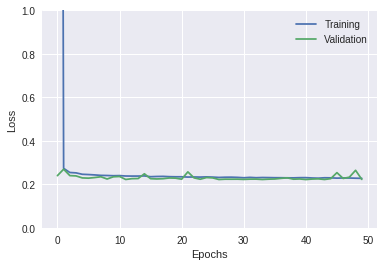

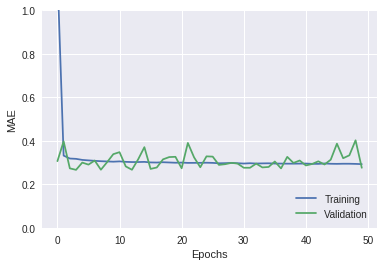

In [55]:
# import matplotlib.pyplot as plt
# %matplotlib inline

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(top=1)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['Training', 'Validation'])

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.ylim(top=1)
plt.plot(hist.history['mean_absolute_error'])
plt.plot(hist.history['val_mean_absolute_error'])
plt.legend(['Training', 'Validation'], loc='lower right')

In [95]:
# Get predicted value for training and test set
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error
from math import sqrt

y_pred = np.exp(y_train_pred)
y_act = np.exp(y_train.values)
rmse_train = sqrt(mean_squared_error(y_act, y_pred))
rmse_train

2913132.588793247

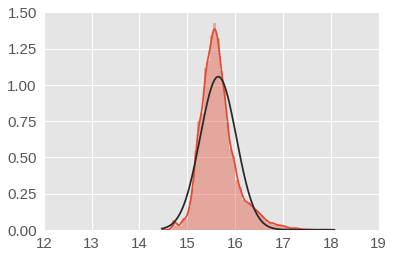

In [96]:
# 'price_doc' predicted for training set
sns.distplot(y_train_pred, fit=norm);
plt.xlim(left=12, right=19)
plt.ylim(top=1.5)
fig = plt.figure()

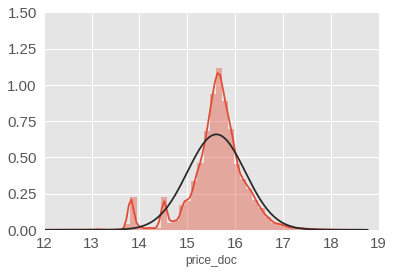

In [97]:
# 'price_doc' actual values for training set
sns.distplot(y_train, fit=norm);
plt.xlim(left=12, right=19)
plt.ylim(top=1.5)
fig = plt.figure()

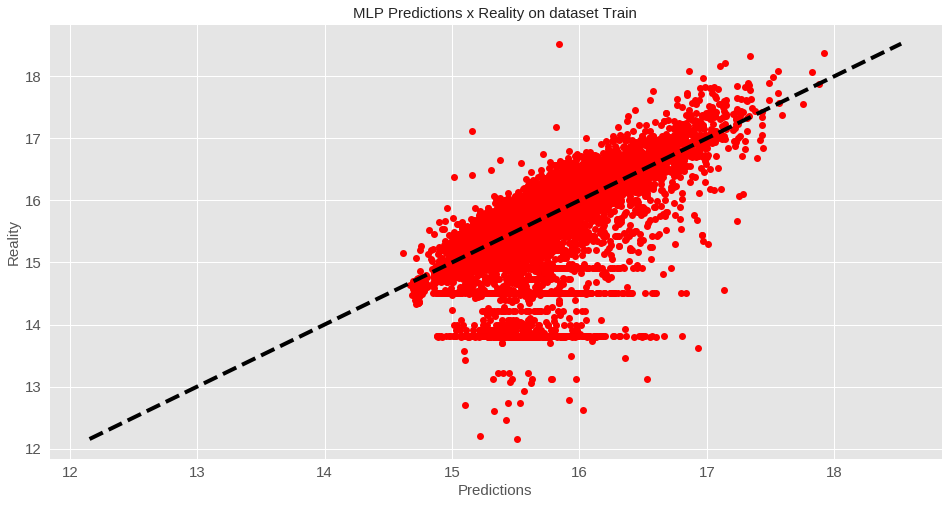

In [98]:
# Prediction x Reality plot for Training Set
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15) 

fig, ax = plt.subplots(figsize=(16, 8))

plt.style.use('ggplot')
plt.plot(y_train_pred, y_train.values, 'ro')
plt.xlabel('Predictions', fontsize = 15)
plt.ylabel('Reality', fontsize = 15)
plt.title('MLP Predictions x Reality on dataset Train', fontsize = 15)
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
plt.show()

In [99]:
y_pred = np.exp(y_test_pred)
y_act = np.exp(y_test.values)
rmse_test = sqrt(mean_squared_error(y_act, y_pred))
rmse_test

3011306.7980069183

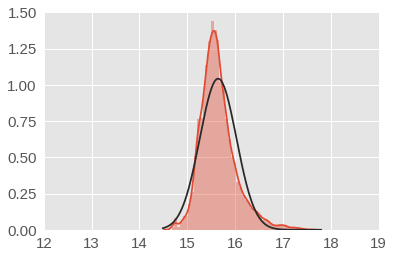

In [100]:
sns.distplot(y_test_pred, fit=norm);
plt.xlim(left=12, right=19)
plt.ylim(top=1.5)
fig = plt.figure()

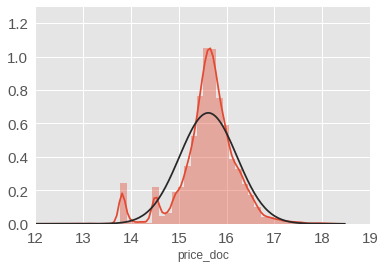

In [101]:
sns.distplot(y_test, fit=norm);
plt.xlim(left=12, right=19)
plt.ylim(top=1.3)
fig = plt.figure()

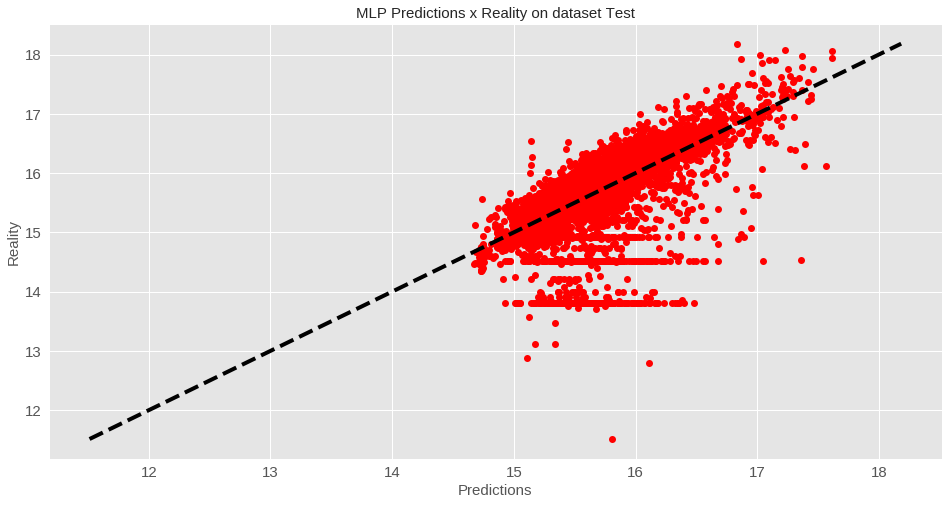

In [102]:
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15) 

fig, ax = plt.subplots(figsize=(16, 8))

plt.style.use('ggplot')
plt.plot(y_test_pred, y_test.values, 'ro')
plt.xlabel('Predictions', fontsize = 15)
plt.ylabel('Reality', fontsize = 15)
plt.title('MLP Predictions x Reality on dataset Test', fontsize = 15)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.show()



## DNN

In [64]:
model_dnn = Sequential()
model_dnn.add(Dense(int(shape_ord), input_dim=shape_ord, kernel_initializer='normal', activation='relu'))
model_dnn.add(Dense(int(shape_ord), input_dim=shape_ord, kernel_initializer='normal', activation='relu'))
model_dnn.add(Dense(int(shape_ord/2), kernel_initializer='normal', activation='relu'))
model_dnn.add(Dense(int(shape_ord/4), kernel_initializer='normal', activation='relu'))
model_dnn.add(Dense(int(shape_ord/8), kernel_initializer='normal', activation='relu'))
# model_dnn.add(Dense(int(shape_ord/16), kernel_initializer='normal', activation='relu'))

#model_dnn.add(Dropout(0.1))
model_dnn.add(Dense(1, kernel_initializer='normal'))
  
model_dnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 28)                812       
_________________________________________________________________
dense_15 (Dense)             (None, 28)                812       
_________________________________________________________________
dense_16 (Dense)             (None, 14)                406       
_________________________________________________________________
dense_17 (Dense)             (None, 7)                 105       
_________________________________________________________________
dense_18 (Dense)             (None, 3)                 24        
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 4         
Total params: 2,163
Trainable params: 2,163
Non-trainable params: 0
_________________________________________________________________


In [0]:
model_dnn.compile(loss='mse', 
              optimizer='sgd', 
              metrics=['mae'])

In [66]:
nb_epoch = 50  # ANN
batch_size = 80
sgd = SGD(lr=0.003, decay=1e-6, momentum=0.9, nesterov=True)

hist_dnn = model_dnn.fit(X_train, y_train, 
                     validation_data=(X_test, y_test),
                     nb_epoch=nb_epoch, batch_size=batch_size, verbose=1)

Train on 21328 samples, validate on 9141 samples
Epoch 1/50
21328/21328 [==============================] - 2s 86us/step - loss: 11.6262 - mean_absolute_error: 1.2849 - val_loss: 0.3528 - val_mean_absolute_error: 0.4203
Epoch 2/50
21328/21328 [==============================] - 2s 84us/step - loss: 0.3451 - mean_absolute_error: 0.4018 - val_loss: 0.3256 - val_mean_absolute_error: 0.3880
Epoch 3/50
21328/21328 [==============================] - 2s 84us/step - loss: 0.3277 - mean_absolute_error: 0.3843 - val_loss: 0.3016 - val_mean_absolute_error: 0.3696
Epoch 4/50
21328/21328 [==============================] - 2s 83us/step - loss: 0.3095 - mean_absolute_error: 0.3678 - val_loss: 0.2771 - val_mean_absolute_error: 0.3608
Epoch 5/50
21328/21328 [==============================] - 2s 82us/step - loss: 0.3186 - mean_absolute_error: 0.3623 - val_loss: 0.2865 - val_mean_absolute_error: 0.3429
Epoch 6/50
15360/21328 [====================>.........] - ETA: 0s - loss: 0.2814 - mean_absolute_error: 0

21328/21328 [==============================] - 2s 82us/step - loss: 0.2737 - mean_absolute_error: 0.3400 - val_loss: 0.2603 - val_mean_absolute_error: 0.3730
Epoch 7/50
21328/21328 [==============================] - 2s 84us/step - loss: 0.2531 - mean_absolute_error: 0.3192 - val_loss: 0.2316 - val_mean_absolute_error: 0.2899
Epoch 8/50
21328/21328 [==============================] - 2s 83us/step - loss: 0.2454 - mean_absolute_error: 0.3105 - val_loss: 0.2292 - val_mean_absolute_error: 0.3164
Epoch 9/50
21328/21328 [==============================] - 2s 84us/step - loss: 0.2420 - mean_absolute_error: 0.3070 - val_loss: 0.2270 - val_mean_absolute_error: 0.3082
Epoch 10/50
21328/21328 [==============================] - 2s 84us/step - loss: 0.2408 - mean_absolute_error: 0.3068 - val_loss: 0.2298 - val_mean_absolute_error: 0.2726
Epoch 11/50
21328/21328 [==============================] - 2s 85us/step - loss: 0.2393 - mean_absolute_error: 0.3049 - val_loss: 0.2281 - val_mean_absolute_error: 0.

21328/21328 [==============================] - 2s 84us/step - loss: 0.2403 - mean_absolute_error: 0.3053 - val_loss: 0.2265 - val_mean_absolute_error: 0.2829
Epoch 13/50
21328/21328 [==============================] - 2s 84us/step - loss: 0.2382 - mean_absolute_error: 0.3032 - val_loss: 0.2265 - val_mean_absolute_error: 0.3157
Epoch 14/50
21328/21328 [==============================] - 2s 85us/step - loss: 0.2385 - mean_absolute_error: 0.3035 - val_loss: 0.2403 - val_mean_absolute_error: 0.3595
Epoch 15/50
21328/21328 [==============================] - 2s 84us/step - loss: 0.2380 - mean_absolute_error: 0.3033 - val_loss: 0.2232 - val_mean_absolute_error: 0.2874
Epoch 16/50
21328/21328 [==============================] - 2s 85us/step - loss: 0.2358 - mean_absolute_error: 0.3003 - val_loss: 0.2226 - val_mean_absolute_error: 0.2808
Epoch 17/50
21328/21328 [==============================] - 2s 82us/step - loss: 0.2359 - mean_absolute_error: 0.3013 - val_loss: 0.2257 - val_mean_absolute_error:

21328/21328 [==============================] - 2s 83us/step - loss: 0.2352 - mean_absolute_error: 0.3002 - val_loss: 0.2267 - val_mean_absolute_error: 0.3163
Epoch 19/50
21328/21328 [==============================] - 2s 84us/step - loss: 0.2354 - mean_absolute_error: 0.3003 - val_loss: 0.2257 - val_mean_absolute_error: 0.2709
Epoch 20/50
21328/21328 [==============================] - 2s 84us/step - loss: 0.2350 - mean_absolute_error: 0.2997 - val_loss: 0.2233 - val_mean_absolute_error: 0.2850
Epoch 21/50
21328/21328 [==============================] - 2s 84us/step - loss: 0.2338 - mean_absolute_error: 0.2991 - val_loss: 0.2235 - val_mean_absolute_error: 0.3061
Epoch 22/50
21328/21328 [==============================] - 2s 83us/step - loss: 0.2326 - mean_absolute_error: 0.2983 - val_loss: 0.2419 - val_mean_absolute_error: 0.3628
Epoch 23/50
21328/21328 [==============================] - 2s 84us/step - loss: 0.2330 - mean_absolute_error: 0.2989 - val_loss: 0.2214 - val_mean_absolute_error:

21328/21328 [==============================] - 2s 84us/step - loss: 0.2325 - mean_absolute_error: 0.2981 - val_loss: 0.2279 - val_mean_absolute_error: 0.3262
Epoch 25/50
21328/21328 [==============================] - 2s 83us/step - loss: 0.2329 - mean_absolute_error: 0.2986 - val_loss: 0.2302 - val_mean_absolute_error: 0.3317
Epoch 26/50
21328/21328 [==============================] - 2s 84us/step - loss: 0.2336 - mean_absolute_error: 0.2993 - val_loss: 0.2232 - val_mean_absolute_error: 0.2701
Epoch 27/50
21328/21328 [==============================] - 2s 85us/step - loss: 0.2323 - mean_absolute_error: 0.2971 - val_loss: 0.2360 - val_mean_absolute_error: 0.3489
Epoch 28/50
21328/21328 [==============================] - 2s 84us/step - loss: 0.2324 - mean_absolute_error: 0.2984 - val_loss: 0.2220 - val_mean_absolute_error: 0.2869
Epoch 29/50
21328/21328 [==============================] - 2s 83us/step - loss: 0.2308 - mean_absolute_error: 0.2963 - val_loss: 0.2234 - val_mean_absolute_error:

21328/21328 [==============================] - 2s 84us/step - loss: 0.2324 - mean_absolute_error: 0.2989 - val_loss: 0.2540 - val_mean_absolute_error: 0.2750
Epoch 31/50
21328/21328 [==============================] - 2s 84us/step - loss: 0.2319 - mean_absolute_error: 0.2971 - val_loss: 0.2217 - val_mean_absolute_error: 0.2796
Epoch 32/50
21328/21328 [==============================] - 2s 86us/step - loss: 0.2307 - mean_absolute_error: 0.2963 - val_loss: 0.2210 - val_mean_absolute_error: 0.2824
Epoch 33/50
21328/21328 [==============================] - 2s 84us/step - loss: 0.2317 - mean_absolute_error: 0.2976 - val_loss: 0.2287 - val_mean_absolute_error: 0.3284
Epoch 34/50
21328/21328 [==============================] - 2s 84us/step - loss: 0.2298 - mean_absolute_error: 0.2956 - val_loss: 0.2210 - val_mean_absolute_error: 0.2929
Epoch 35/50
21328/21328 [==============================] - 2s 84us/step - loss: 0.2311 - mean_absolute_error: 0.2971 - val_loss: 0.2281 - val_mean_absolute_error:

21328/21328 [==============================] - 2s 85us/step - loss: 0.2298 - mean_absolute_error: 0.2951 - val_loss: 0.2348 - val_mean_absolute_error: 0.2660
Epoch 37/50
21328/21328 [==============================] - 2s 83us/step - loss: 0.2294 - mean_absolute_error: 0.2950 - val_loss: 0.2203 - val_mean_absolute_error: 0.2910
Epoch 38/50
21328/21328 [==============================] - 2s 83us/step - loss: 0.2307 - mean_absolute_error: 0.2970 - val_loss: 0.2344 - val_mean_absolute_error: 0.2627
Epoch 39/50
21328/21328 [==============================] - 2s 83us/step - loss: 0.2297 - mean_absolute_error: 0.2956 - val_loss: 0.2214 - val_mean_absolute_error: 0.2765
Epoch 40/50
21328/21328 [==============================] - 2s 84us/step - loss: 0.2298 - mean_absolute_error: 0.2958 - val_loss: 0.2207 - val_mean_absolute_error: 0.2854
Epoch 41/50
21328/21328 [==============================] - 2s 83us/step - loss: 0.2287 - mean_absolute_error: 0.2945 - val_loss: 0.2243 - val_mean_absolute_error:

21328/21328 [==============================] - 2s 84us/step - loss: 0.2285 - mean_absolute_error: 0.2944 - val_loss: 0.2217 - val_mean_absolute_error: 0.2815
Epoch 43/50
21328/21328 [==============================] - 2s 83us/step - loss: 0.2286 - mean_absolute_error: 0.2948 - val_loss: 0.2212 - val_mean_absolute_error: 0.2916
Epoch 44/50
21328/21328 [==============================] - 2s 82us/step - loss: 0.2299 - mean_absolute_error: 0.2961 - val_loss: 0.2219 - val_mean_absolute_error: 0.2992
Epoch 45/50
21328/21328 [==============================] - 2s 82us/step - loss: 0.2287 - mean_absolute_error: 0.2950 - val_loss: 0.2248 - val_mean_absolute_error: 0.2678
Epoch 46/50
21328/21328 [==============================] - 2s 83us/step - loss: 0.2284 - mean_absolute_error: 0.2941 - val_loss: 0.2213 - val_mean_absolute_error: 0.2919
Epoch 47/50
21328/21328 [==============================] - 2s 81us/step - loss: 0.2281 - mean_absolute_error: 0.2941 - val_loss: 0.2214 - val_mean_absolute_error:

21328/21328 [==============================] - 2s 83us/step - loss: 0.2289 - mean_absolute_error: 0.2956 - val_loss: 0.2211 - val_mean_absolute_error: 0.2916
Epoch 49/50
21328/21328 [==============================] - 2s 84us/step - loss: 0.2276 - mean_absolute_error: 0.2935 - val_loss: 0.2317 - val_mean_absolute_error: 0.3310
Epoch 50/50
21328/21328 [==============================] - 2s 84us/step - loss: 0.2266 - mean_absolute_error: 0.2930 - val_loss: 0.2211 - val_mean_absolute_error: 0.2817


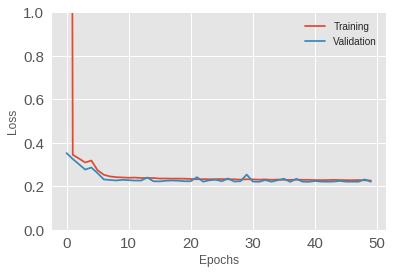

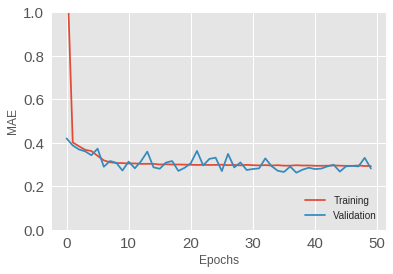

In [67]:
# import matplotlib.pyplot as plt
# %matplotlib inline

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(top=1)
plt.plot(hist_dnn.history['loss'])
plt.plot(hist_dnn.history['val_loss'])
plt.legend(['Training', 'Validation'])

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.ylim(top=1)
plt.plot(hist_dnn.history['mean_absolute_error'])
plt.plot(hist_dnn.history['val_mean_absolute_error'])
plt.legend(['Training', 'Validation'], loc='lower right')

In [103]:
y_train_pred_dnn = model_dnn.predict(X_train)
y_test_pred_dnn = model_dnn.predict(X_test)

from sklearn.metrics import mean_squared_error
from math import sqrt

y_pred_dnn = np.exp(y_train_pred_dnn)
y_act = np.exp(y_train.values)
rmse_dnn_train = sqrt(mean_squared_error(y_act, y_pred_dnn))
rmse_dnn_train

2903201.9312113547

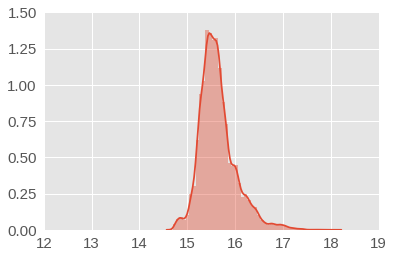

In [104]:
sns.distplot(y_train_pred_dnn);
plt.xlim(left=12, right=19)
plt.ylim(top=1.5)
fig = plt.figure()

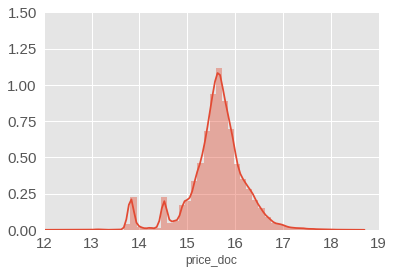

In [105]:
sns.distplot(y_train);
plt.xlim(left=12, right=19)
plt.ylim(top=1.5)
fig = plt.figure()

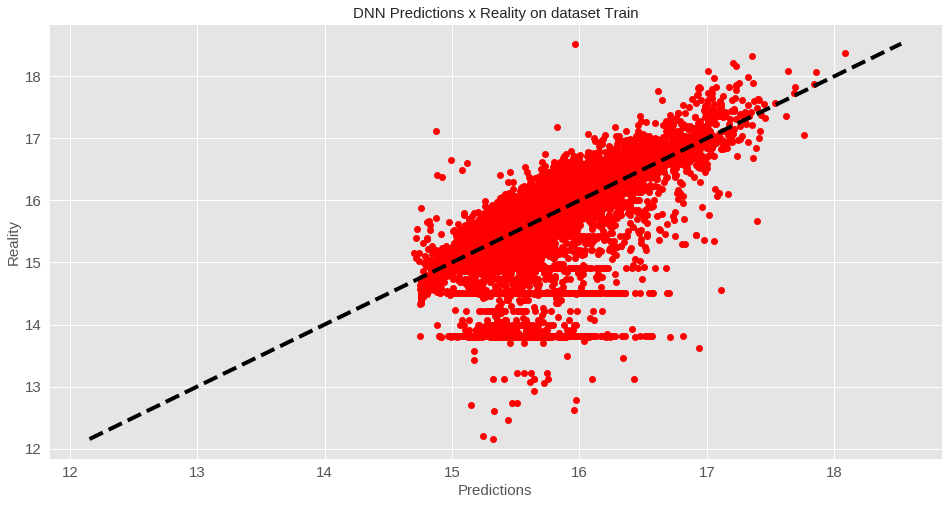

In [106]:
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15) 

fig, ax = plt.subplots(figsize=(16, 8))

plt.style.use('ggplot')
plt.plot(y_train_pred_dnn, y_train.values, 'ro')
plt.xlabel('Predictions', fontsize = 15)
plt.ylabel('Reality', fontsize = 15)
plt.title('DNN Predictions x Reality on dataset Train', fontsize = 15)
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
plt.show()

In [107]:
y_pred_dnn = np.exp(y_test_pred_dnn)
y_act = np.exp(y_test.values)
rmse_dnn_test = sqrt(mean_squared_error(y_act, y_pred_dnn))
rmse_dnn_test

2996135.427162068

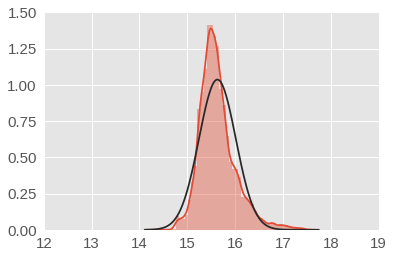

In [108]:
sns.distplot(y_test_pred_dnn, fit=norm);
plt.xlim(left=12, right=19)
plt.ylim(top=1.5)
fig = plt.figure()

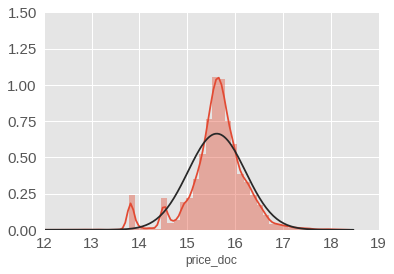

In [109]:
sns.distplot(y_test, fit=norm);
plt.xlim(left=12, right=19)
plt.ylim(top=1.5)
fig = plt.figure()

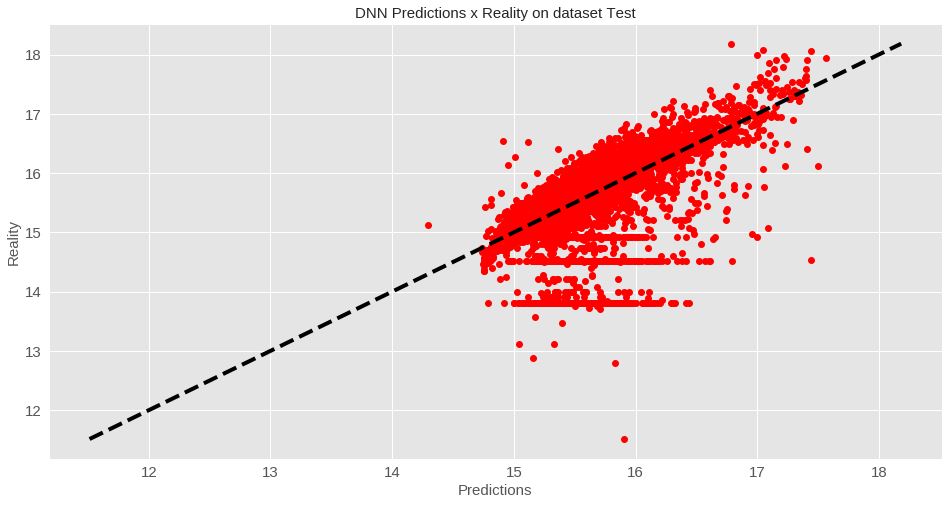

In [110]:
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15) 

fig, ax = plt.subplots(figsize=(16, 8))

plt.style.use('ggplot')
plt.plot(y_test_pred_dnn, y_test.values, 'ro')
plt.xlabel('Predictions', fontsize = 15)
plt.ylabel('Reality', fontsize = 15)
plt.title('DNN Predictions x Reality on dataset Test', fontsize = 15)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.show()


## GRNN

In [76]:
!pip install neupy

    100% |████████████████████████████████| 133kB 7.4MB/s 
    100% |████████████████████████████████| 2.9MB 11.6MB/s 
  Running setup.py bdist_wheel for neupy ... - \ | done
  Stored in directory: /content/.cache/pip/wheels/57/8d/ba/e1bd9ce274a6341b46a326dace1aa0306b0bb77f7e9d2b5224
  Running setup.py bdist_wheel for Theano ... - \ | / - \ | / done
  Stored in directory: /content/.cache/pip/wheels/f3/09/87/48b9871203bd988f59421d9f46e06db5cca884a322d39a5eff
  Running setup.py bdist_wheel for tableprint ... - done
  Stored in directory: /content/.cache/pip/wheels/f3/85/50/13fdeeb11b9453c850be1b5b964471e05d5b9454d8c3c56e76
Successfully built neupy Theano tableprint


In [0]:
from sklearn import datasets, preprocessing
from sklearn.model_selection import train_test_split
from neupy import algorithms, estimators, environment

In [0]:
environment.reproducible()

In [79]:
nw = algorithms.GRNN(std=1, verbose=True)


Main information

[ALGORITHM] GRNN

[OPTION] verbose = True
[OPTION] epoch_end_signal = None
[OPTION] show_epoch = 1
[OPTION] shuffle_data = False
[OPTION] step = 0.1
[OPTION] train_end_signal = None
[OPTION] std = 1



In [0]:
nw.train(X_train, y_train)

In [0]:
y_test_pred_grnn = nw.predict(X_test)
y_train_pred_grnn = nw.predict(X_train)

In [111]:
y_pred_grnn = np.exp(y_train_pred_grnn)
y_act = np.exp(y_train.values)

rmse_grnn_train = sqrt(mean_squared_error(y_act, y_pred_grnn))
rmse_grnn_train

1960511.8307507318

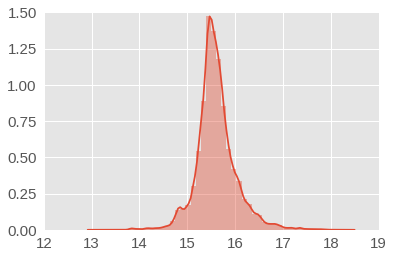

In [83]:
sns.distplot(y_train_pred_grnn);
plt.xlim(left=12, right=19)
plt.ylim(top=1.5)
fig = plt.figure()

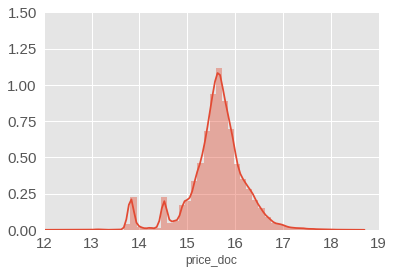

In [84]:
sns.distplot(y_train);
plt.xlim(left=12, right=19)
plt.ylim(top=1.5)
fig = plt.figure()

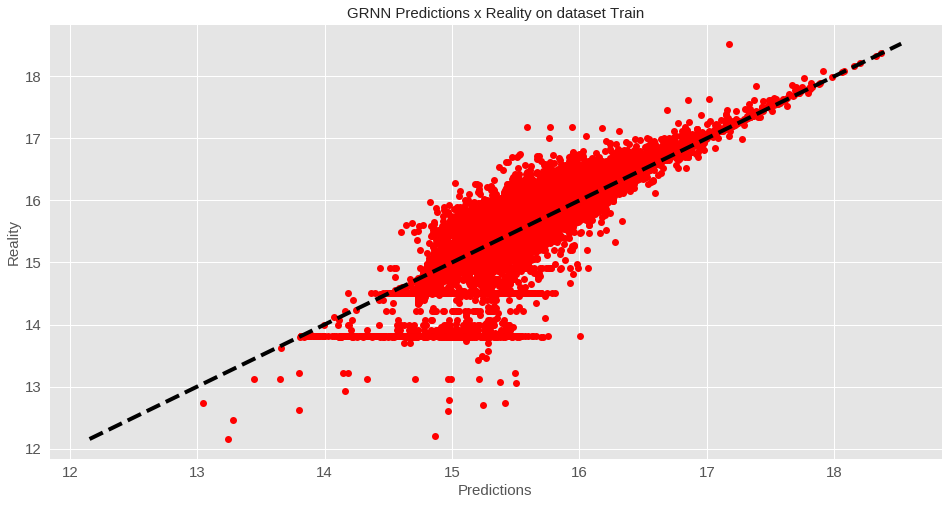

In [85]:
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15) 

fig, ax = plt.subplots(figsize=(16, 8))

plt.style.use('ggplot')
plt.plot(y_train_pred_grnn, y_train.values, 'ro')
plt.xlabel('Predictions', fontsize = 15)
plt.ylabel('Reality', fontsize = 15)
plt.title('GRNN Predictions x Reality on dataset Train', fontsize = 15)
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
plt.show()

In [112]:
y_pred_grnn = np.exp(y_test_pred_grnn)
y_act = np.exp(y_test.values)

rmse_grnn_test = sqrt(mean_squared_error(y_act, y_pred_grnn))
rmse_grnn_test

3731881.889885355

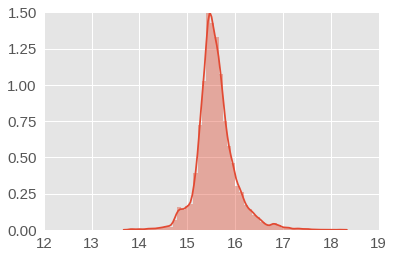

In [87]:
sns.distplot(y_test_pred_grnn);
plt.xlim(left=12, right=19)
plt.ylim(top=1.5)
fig = plt.figure()

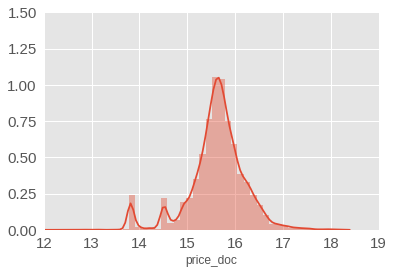

In [88]:
sns.distplot(y_test);
plt.xlim(left=12, right=19)
plt.ylim(top=1.5)
fig = plt.figure()

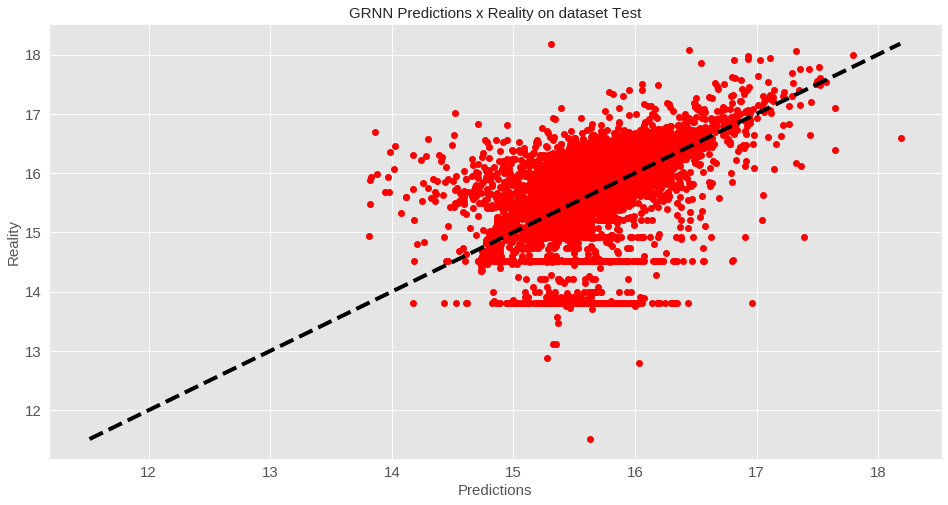

In [113]:
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15) 

fig, ax = plt.subplots(figsize=(16, 8))

plt.style.use('ggplot')
plt.plot(y_test_pred_grnn, y_test.values, 'ro')
plt.xlabel('Predictions', fontsize = 15)
plt.ylabel('Reality', fontsize = 15)
plt.title('GRNN Predictions x Reality on dataset Test', fontsize = 15)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.show()

## Ensemble results

In [115]:
y_esb = (1/3)*(y_pred + y_pred_dnn + y_pred_grnn)

rmse_esb = sqrt(mean_squared_error(y_act, y_esb))
rmse_esb

3033213.9116421235